# LOGISTIK REGRESYON

In [34]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Veri Seti Hikayesi ve Problem : Şeker Hastalığı Tahmini

In [5]:
df = pd.read_csv("verisetleri\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Hasta bilgileri ve tahlil bilgileri üzerinden tahmin yapılacak.

In [7]:
# Preganacies-> hamilelik sayısı, Glucose-> gilikoz, BlookPressure-> kan basıncı, BMI-> vücut kitle endesi
# Outcome -> şekir hastalığını ifade eder

## Lojistic Regresyon
## Model & Tahmin

In [ ]:
# TEST VE TRAIN OLARAK AYRIM YAPILMADIĞINA DİKKAT EDİNİZ. SONRAKİ BÖLÜMLERDE YAPILACAKTIR.

In [8]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
 # Hamilelik max 17 aykırı gözlem olabilir. ( Diğer keşifçi veri analizine ilişkin bazı değerlendirmeler yapılmalıdır. Ve veri önişlemle adımları uygulanmalıdır. )

In [11]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [12]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [13]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
# "liblinear" --> Lojistik regresyonda katsayıları bulabilmek adına kullanılan birden fazla minimizasyon yaklaşımı var. Yani gerçek değerler ile tahmin edilen değerler arasındaki farkların karelerinin toplamını ifade etmek adına bu sefer loglost gibi veya klasik regresyondan alışık olduğumuz yöntemler gibi bazı birbirinden farklı yöntemler var. Hatta ritch ve lasso dan alışık olduğumuz düzenlileştirme yöntemlerinin de işin içine katıldığı bazı katsayı bulma yöntemleri var. Bu sebeple bunu liblinear olarak ifade ettik.
loj_model = LogisticRegression(solver="liblinear").fit(X, y)

In [15]:
# B0 katsayısı
loj_model.intercept_

array([-5.88581574])

In [16]:
# Bağımısız değişkenlerin katsayıları
loj_model.coef_

array([[ 1.17109287e-01,  2.83637114e-02, -1.69030150e-02,
         7.35724571e-04, -6.42784045e-04,  5.96466920e-02,
         6.85700638e-01,  7.19299389e-03]])

### TAHMİN İŞLEMLERİ

In [17]:
# Tahmin edilen değerler
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [18]:
# Gerçek değerler
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [19]:
# Başarısının değerlendirilmesi
y_pred = loj_model.predict(X)

In [20]:
# Karmaşıklık matrisi
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]], dtype=int64)

In [21]:
# Karmaşıklık matrisinin değerlerini yorumlamak kolay olmayacağızndan accuracy_score kullanacağız.
# accuracy_score() --> doğruluk oranı, (başarılı işler) / (tüm durum)
accuracy_score(y, y_pred)

0.7760416666666666

### Detaylı sınıflandırma raporu

In [24]:
# DAHA DETAYLI BİR SINIFLANDIRMA RAPORU ALMAK İÇİN classification_report KULLANILIR
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



### Olasılık Değerlerinin Bulunması

In [25]:
# Bazı durmlarda sonuçları 1-bir ve 0-sıfır olarak değilde, direk olasılık değerlerinin kendisinden almak istersek - ki logistik fonksiyonu bize birinci sınıfın yani ilgilenmiş oluduğumuz 1-bir sınıfının gerçekleşme olasılığını veriyordu. - predict_proba() fonksiyonunu kullanırız.
loj_model.predict_proba(X)[0:10]

array([[0.35043779, 0.64956221],
       [0.91696356, 0.08303644],
       [0.22433864, 0.77566136],
       [0.92141996, 0.07858004],
       [0.16538713, 0.83461287],
       [0.79904414, 0.20095586],
       [0.88018381, 0.11981619],
       [0.27825923, 0.72174077],
       [0.32175629, 0.67824371],
       [0.9226324 , 0.0773676 ]])

In [26]:
# predict() fonksiyonu arka planda bu değerleri 0-sıfır ve 1-dönüştürmektedir.
# Bu sonuçlarda ilgileneceğimiz yani 1-bir ve 0-sıfır değerlerinin gösterildiği bölüm ikinci sutün dur. 

### ROC eğrisinin oluşturulması 

In [ ]:
# ROC EGRİSİ : False positive rate ve true positive rate ler üzerinden oluşturulan bir grafik aracılığı ile bize bilgi sunan bir değerdir. Eğri altındaki alan ile ilgileniyorduk. Bu ne kadar büyük ise modelimiz o kadar başarılı şeklinde yorumlar yapabiliriz.

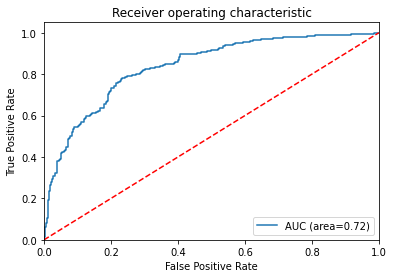

In [27]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area=%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### MODEL TUNNING ( MODEL VALIDATION - MODEL DOĞRULAMA )

In [28]:
# Regression bölümünde olduğu gibi bir model tunning işlemi ele alınmayacaktır. Model doğrulama, model validation işlemi yapılacaktır. Konu bütünlüğü olması açısından model tunning şeklinde isimlendirdik.

In [29]:
# Fakat yinede logjistik regresyon yöntemlerinde tune edilmesi gereken hipeparametreler bulunmaktadır. Örneğin ritch, lasso ve elasticnet ten alışık olduğumuz l1 normu yani bir düzenlileştirme katsayısı modelde bulunduğunda buna yönelik olarak bir lojistik regresyon kullanıldığında parametre tahminleri için bu durumda aslına bakarsanız optimize edilmesi gereken bir hiperparametre elimizde olmuş oluyor. Fakat bizim kullanmış olduğumuz linear lojistic regresyon modeli klasik lojistik regresyon modeli bu sebeple extra bir hiperparametremiz yok.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
loj_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [32]:
y_pred = loj_model.predict(X_test)

In [33]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [35]:
cross_val_score(loj_model, X_test, y_test)

array([0.78723404, 0.82608696, 0.82608696, 0.69565217, 0.73913043])

In [36]:
# Birden fazla hata hesaplama işlemi gerçekleştirmektedir. Biz bunu dilediğimiz katlı örneğin 10 katlı olacak şekilde gerçekleştirebiliriz. Öntanımlı değeri itibariyle 5 tane gelmiş oldu.

In [37]:
cross_val_score(loj_model, X_test, y_test, cv=10)

array([0.79166667, 0.82608696, 0.73913043, 0.82608696, 0.73913043,
       0.91304348, 0.69565217, 0.65217391, 0.65217391, 0.82608696])

In [38]:
# mean ile bunların ortalamasını alabiliriz. Böylece test setine ilişkin daha doğru bir test hatası değerine erişmiş oluruz.

In [39]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7661231884057972

In [ ]:
# SONRAKİ UYGULAMALARDA SADECE accuracy_score() DEĞERLENDİRMESİ YAPACAĞIZ. Hiper parametrelerin optimum değerlerine ulaşmak için de cross validation yöntemini kullanmış olacağız.
# Yani modelleri train seti ile eğitirken cross validation yöntemini kullanacağız. Ve dışarda bıraktığımız test setini performansı test etmek için kullanmış olacağız.